In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images.shape

(55000, 784)

In [6]:
sample = mnist.train.images[22].reshape(28,28)

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

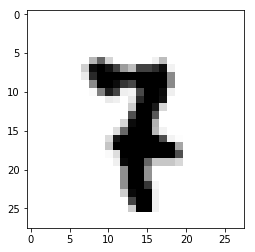

In [9]:
# sampling our data to visualize it
plt.imshow(sample,cmap='Greys')

In [10]:
# defining variables
learning_rate = 0.001
training_epochs = 45
batch_size = 100

In [11]:
n_classes = 10
n_samples = mnist.train.num_examples

In [12]:
n_input = 784 # flattened 28 * 28 matrix

In [13]:
n_hidden_1 = 256 #neurons per hidden layer in layer 1
n_hidden_2 = 256 #neurons per hidden layer in layer 2

In [14]:
# our multi_later fn
def multilayer_perceptron(x, weights, biases):
    '''
    x: Placeholder for Data Input
    weights: Dict of weights
    biases: dict of bias values
    '''
    
    # First Hidden Layer with RELU Activation 
    # x * W + B
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # func (x *W + B) = RELU -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden Layer with RELU Activation 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Output layer
    out_layer = tf.matmul(layer_2, weights['out'] + biases['out'])
    
    return out_layer


In [15]:
#randomly generated weights and biases
weights = {
    'h1':tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [16]:
weights

{'h1': <tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>}

In [17]:
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [18]:
x = tf.placeholder('float', (None, n_input))

In [19]:
y = tf.placeholder('float', (None, n_classes))

In [20]:
pred = multilayer_perceptron(x, weights,biases)

In [21]:
# define cost and optimization fns
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [22]:
#Training the model

In [23]:
# we create an interactive session
sess = tf.InteractiveSession()

In [24]:
# initialize all the variables we created before
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [25]:
sess.run(init)

In [26]:
for epoch in range(training_epochs):
    #cost
    avg_cost =0.0
    total_batch = int(n_samples/batch_size)
    for i in range(total_batch):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        
        _,c = sess.run([optimizer,cost], feed_dict={x:batch_x,y:batch_y})
        avg_cost += c/total_batch
        
    print("Epoch: {} cost{:.4f}".format(epoch+1, avg_cost))
    
print("moel has completed {} Epochs of training".format(training_epochs))

Epoch: 1 cost750.6685
Epoch: 2 cost21.9971
Epoch: 3 cost6.0306
Epoch: 4 cost3.0782
Epoch: 5 cost2.3550
Epoch: 6 cost2.0574
Epoch: 7 cost1.8676
Epoch: 8 cost1.7256
Epoch: 9 cost1.6104
Epoch: 10 cost1.5113
Epoch: 11 cost1.4239
Epoch: 12 cost1.3408
Epoch: 13 cost1.2519
Epoch: 14 cost1.1281
Epoch: 15 cost1.0056
Epoch: 16 cost0.9176
Epoch: 17 cost0.8692
Epoch: 18 cost0.7969
Epoch: 19 cost0.7509
Epoch: 20 cost0.6916
Epoch: 21 cost0.6363
Epoch: 22 cost0.6086
Epoch: 23 cost0.5654
Epoch: 24 cost0.5241
Epoch: 25 cost0.4988
Epoch: 26 cost0.4360
Epoch: 27 cost0.4039
Epoch: 28 cost0.3890
Epoch: 29 cost0.3704
Epoch: 30 cost0.3463
Epoch: 31 cost0.3283
Epoch: 32 cost0.3253
Epoch: 33 cost0.3130
Epoch: 34 cost0.2906
Epoch: 35 cost0.2842
Epoch: 36 cost0.2730
Epoch: 37 cost0.2671
Epoch: 38 cost0.2533
Epoch: 39 cost0.2434
Epoch: 40 cost0.2334
Epoch: 41 cost0.2274
Epoch: 42 cost0.2197
Epoch: 43 cost0.2134
Epoch: 44 cost0.2021
Epoch: 45 cost0.1998
moel has completed 45 Epochs of training


In [27]:
# Model Evaluations

In [28]:
correct_predictions = tf.equal(tf.argmax(pred,1 ),tf.argmax(y,1))

In [29]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [30]:
correct_predictions = tf.cast(correct_predictions, 'float')

In [31]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [32]:
accuracy = tf.reduce_mean(correct_predictions)

In [33]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [34]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.92320001